<a href="https://colab.research.google.com/github/alfie-agustin/redes-nuronales/blob/main/redes_neruonales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import helper
import pandas as pd

In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from matplotlib import pyplot
from pandas import DataFrame
from keras.layers import Dropout


In [ ]:
url1 = 'https://raw.githubusercontent.com/alfie-agustin/Sistemas-inteligencia-artificial/main/sponge.data'

In [ ]:
df = pd.read_csv(url1, delimiter=',', engine= 'python', header= None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO,OTROS,RUGOSA,RADIAL,NO,NO,NO,DURO
1,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TRICHOSTEMA_HEMISPHAERICUM,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,4,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,HEMISFERICA,2,SI,OTROS,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
72,TRICHOSTEMA_SARSI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,DE_CONO_INVERTIDO,2,SI,?,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
73,TYLEXOCLADUS_JOUBINI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,ECTOSOMICOS_EN_RAMILLETES,...,DE_REVESTIMIENTO,0,NO,?,HISPIDEZ_MAYOR_HACIA_LA_BASE,RADIAL,NO,NO,NO,DURO
74,WEBERELLA_BURSA,2_CAPAS,TANGENCIAL,SI,SI,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,GLOBULOSA,2,SI,OTROS,ATERCIOPELADA,RADIAL_EN_PERIFERIA,NO,NO,NO,DURO


In [ ]:
df.rename(columns={df.columns[39]: 'Color', df.columns[44]: 'AlojaCAngrejo'})

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,Color,40,41,42,43,AlojaCAngrejo,45
0,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO,OTROS,RUGOSA,RADIAL,NO,NO,NO,DURO
1,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TRICHOSTEMA_HEMISPHAERICUM,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,4,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,HEMISFERICA,2,SI,OTROS,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
72,TRICHOSTEMA_SARSI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,DE_CONO_INVERTIDO,2,SI,?,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
73,TYLEXOCLADUS_JOUBINI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,ECTOSOMICOS_EN_RAMILLETES,...,DE_REVESTIMIENTO,0,NO,?,HISPIDEZ_MAYOR_HACIA_LA_BASE,RADIAL,NO,NO,NO,DURO
74,WEBERELLA_BURSA,2_CAPAS,TANGENCIAL,SI,SI,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,GLOBULOSA,2,SI,OTROS,ATERCIOPELADA,RADIAL_EN_PERIFERIA,NO,NO,NO,DURO


In [ ]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7      int64
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28     int64
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37     int64
38    object
39    object
40    object
41    object
42    object
43    object
44    object
45    object
dtype: object

#Preprocesamiento

In [ ]:
def Encoder(df):
          from sklearn import preprocessing
          le = preprocessing.LabelEncoder()
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          #le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [ ]:
df = Encoder(df)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0,0,3,1,0,0,0,3,0,4,...,5,0,0,3,5,4,0,0,0,2
1,1,3,3,0,2,2,2,0,0,4,...,4,0,0,0,4,1,0,1,0,2
2,2,3,3,0,2,2,2,0,0,4,...,4,1,1,3,4,1,0,1,0,2
3,3,3,3,0,2,2,2,0,0,4,...,5,3,1,3,4,1,0,1,0,2
4,4,3,3,0,2,2,2,0,0,4,...,4,0,0,3,4,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,0,3,1,0,0,0,4,0,3,...,3,2,1,3,2,4,0,0,0,1
72,72,0,3,1,0,0,0,3,0,3,...,0,2,1,0,2,4,0,0,0,1
73,73,0,3,1,0,0,0,3,0,1,...,1,0,0,0,3,4,0,0,0,2
74,74,1,4,1,1,0,0,3,0,3,...,2,2,1,3,0,5,0,0,0,2


In [ ]:
df[44].unique()

array([0, 1])

#Se separa en Train y Test


In [ ]:
from sklearn.model_selection import train_test_split

x1 = df.drop(columns = [44]).copy()
y1 = df[44]

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.20 )


print(x_train1.shape), print(y_train1.shape)
print(x_test1.shape), print(y_test1.shape)

(60, 45)
(60,)
(16, 45)
(16,)


(None, None)

#Red Neuronal

In [ ]:
modelo = keras.Sequential()
modelo.add(Dense( units = 45, input_shape = [45], activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [ ]:
modelo.compile(
    optimizer = keras.optimizers.Adam(0.0001),
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)

In [ ]:
print('Cominenzo entrenamiento')


historial = modelo.fit(x_train1, y_train1, epochs =10000, verbose = False)


print("Modelo entrenado")

Cominenzo entrenamiento
Modelo entrenado


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


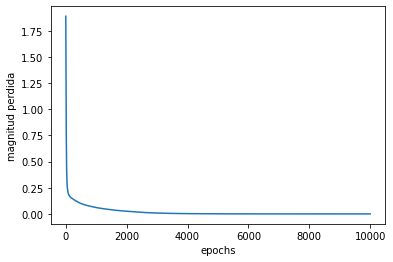

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("epochs")
plt.ylabel("magnitud perdida")
plt.plot(historial.history["loss"])

In [ ]:
pred = modelo.predict(x_test1)

In [ ]:
modelo.evaluate(x_test1, y_test1)

1/1 [==============================] - 0s 117ms/step - loss: 0.5092 - accuracy: 0.9375


[0.5091813206672668, 0.9375]

#Optimizacion

In [96]:
epochs = [1000, 2000, 2500, 3000, 3500]
batchsize = [20, 30 , 40, 50, 60]

In [97]:
parameter_grid = dict(batch_size = batchsize, epochs = epochs)

In [98]:
from sklearn.model_selection import GridSearchCV

In [112]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
from scikeras.wrappers import KerasClassifier

In [ ]:
Kmodel = KerasClassifier(build_fn=modelo, verbose=1)
grid = GridSearchCV(estimator=Kmodel, param_grid=parameter_grid, scoring='accuracy', n_jobs=-1, refit='boolean')
grid_result = grid.fit(x_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
